### Problem definition
This is the first step of machine learning life cycle.Here we analyse what kind of problem is, how to solve it. So for this project we are using a car dataset, where we want to predict the selling price of car based on its certain features. Since we need to find the real value, with real calculation, therefore this problem is regression problem. We will be using regression machine learning algorithms to solve this problem.

In [1]:
## loading the requirements liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


## Data Gathering

In [4]:
##load the dataset
dataset=pd.read_csv('~/Genrative_ai/car_prediction_8/car_dataset.csv')
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Preperation

In [5]:
dataset.shape

(301, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#check statistical summary of all the columns with numerical values.
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
#check if there is any missing value in the dataset
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Feature Engineering

In [9]:
## adding the column with current year
dataset['Current_Year']=2020
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [10]:
### creating new column which age of vehicle
dataset['Vehicle_Age']=dataset['Current_Year'] - dataset['Year']
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [11]:
### getting dummies for these columns with help of pandas libarary
dataset=pd.get_dummies(dataset,columns=['Fuel_Type','Transmission','Seller_Type'],drop_first=True)

##drop the irrelavant columns
dataset.drop(columns=['Year','Current_Year','Car_Name'],inplace=True)

In [12]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,3.35,5.59,27000,0,6,0,1,1,0
1,4.75,9.54,43000,0,7,1,0,1,0
2,7.25,9.85,6900,0,3,0,1,1,0
3,2.85,4.15,5200,0,9,0,1,1,0
4,4.60,6.87,42450,0,6,1,0,1,0



Fuel_Type feature:
* Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1
* Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0
* Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0

Transmission feature:
* transmission is manual if Transmission_Manual = 1
* transmission is automatic if Transmission_Manual = 0

Seller_Type feature:
* Seller_Type is Individual if Seller_Type_Individual = 1
* Seller_Type is dealer if Seller_Type_Individual = 0



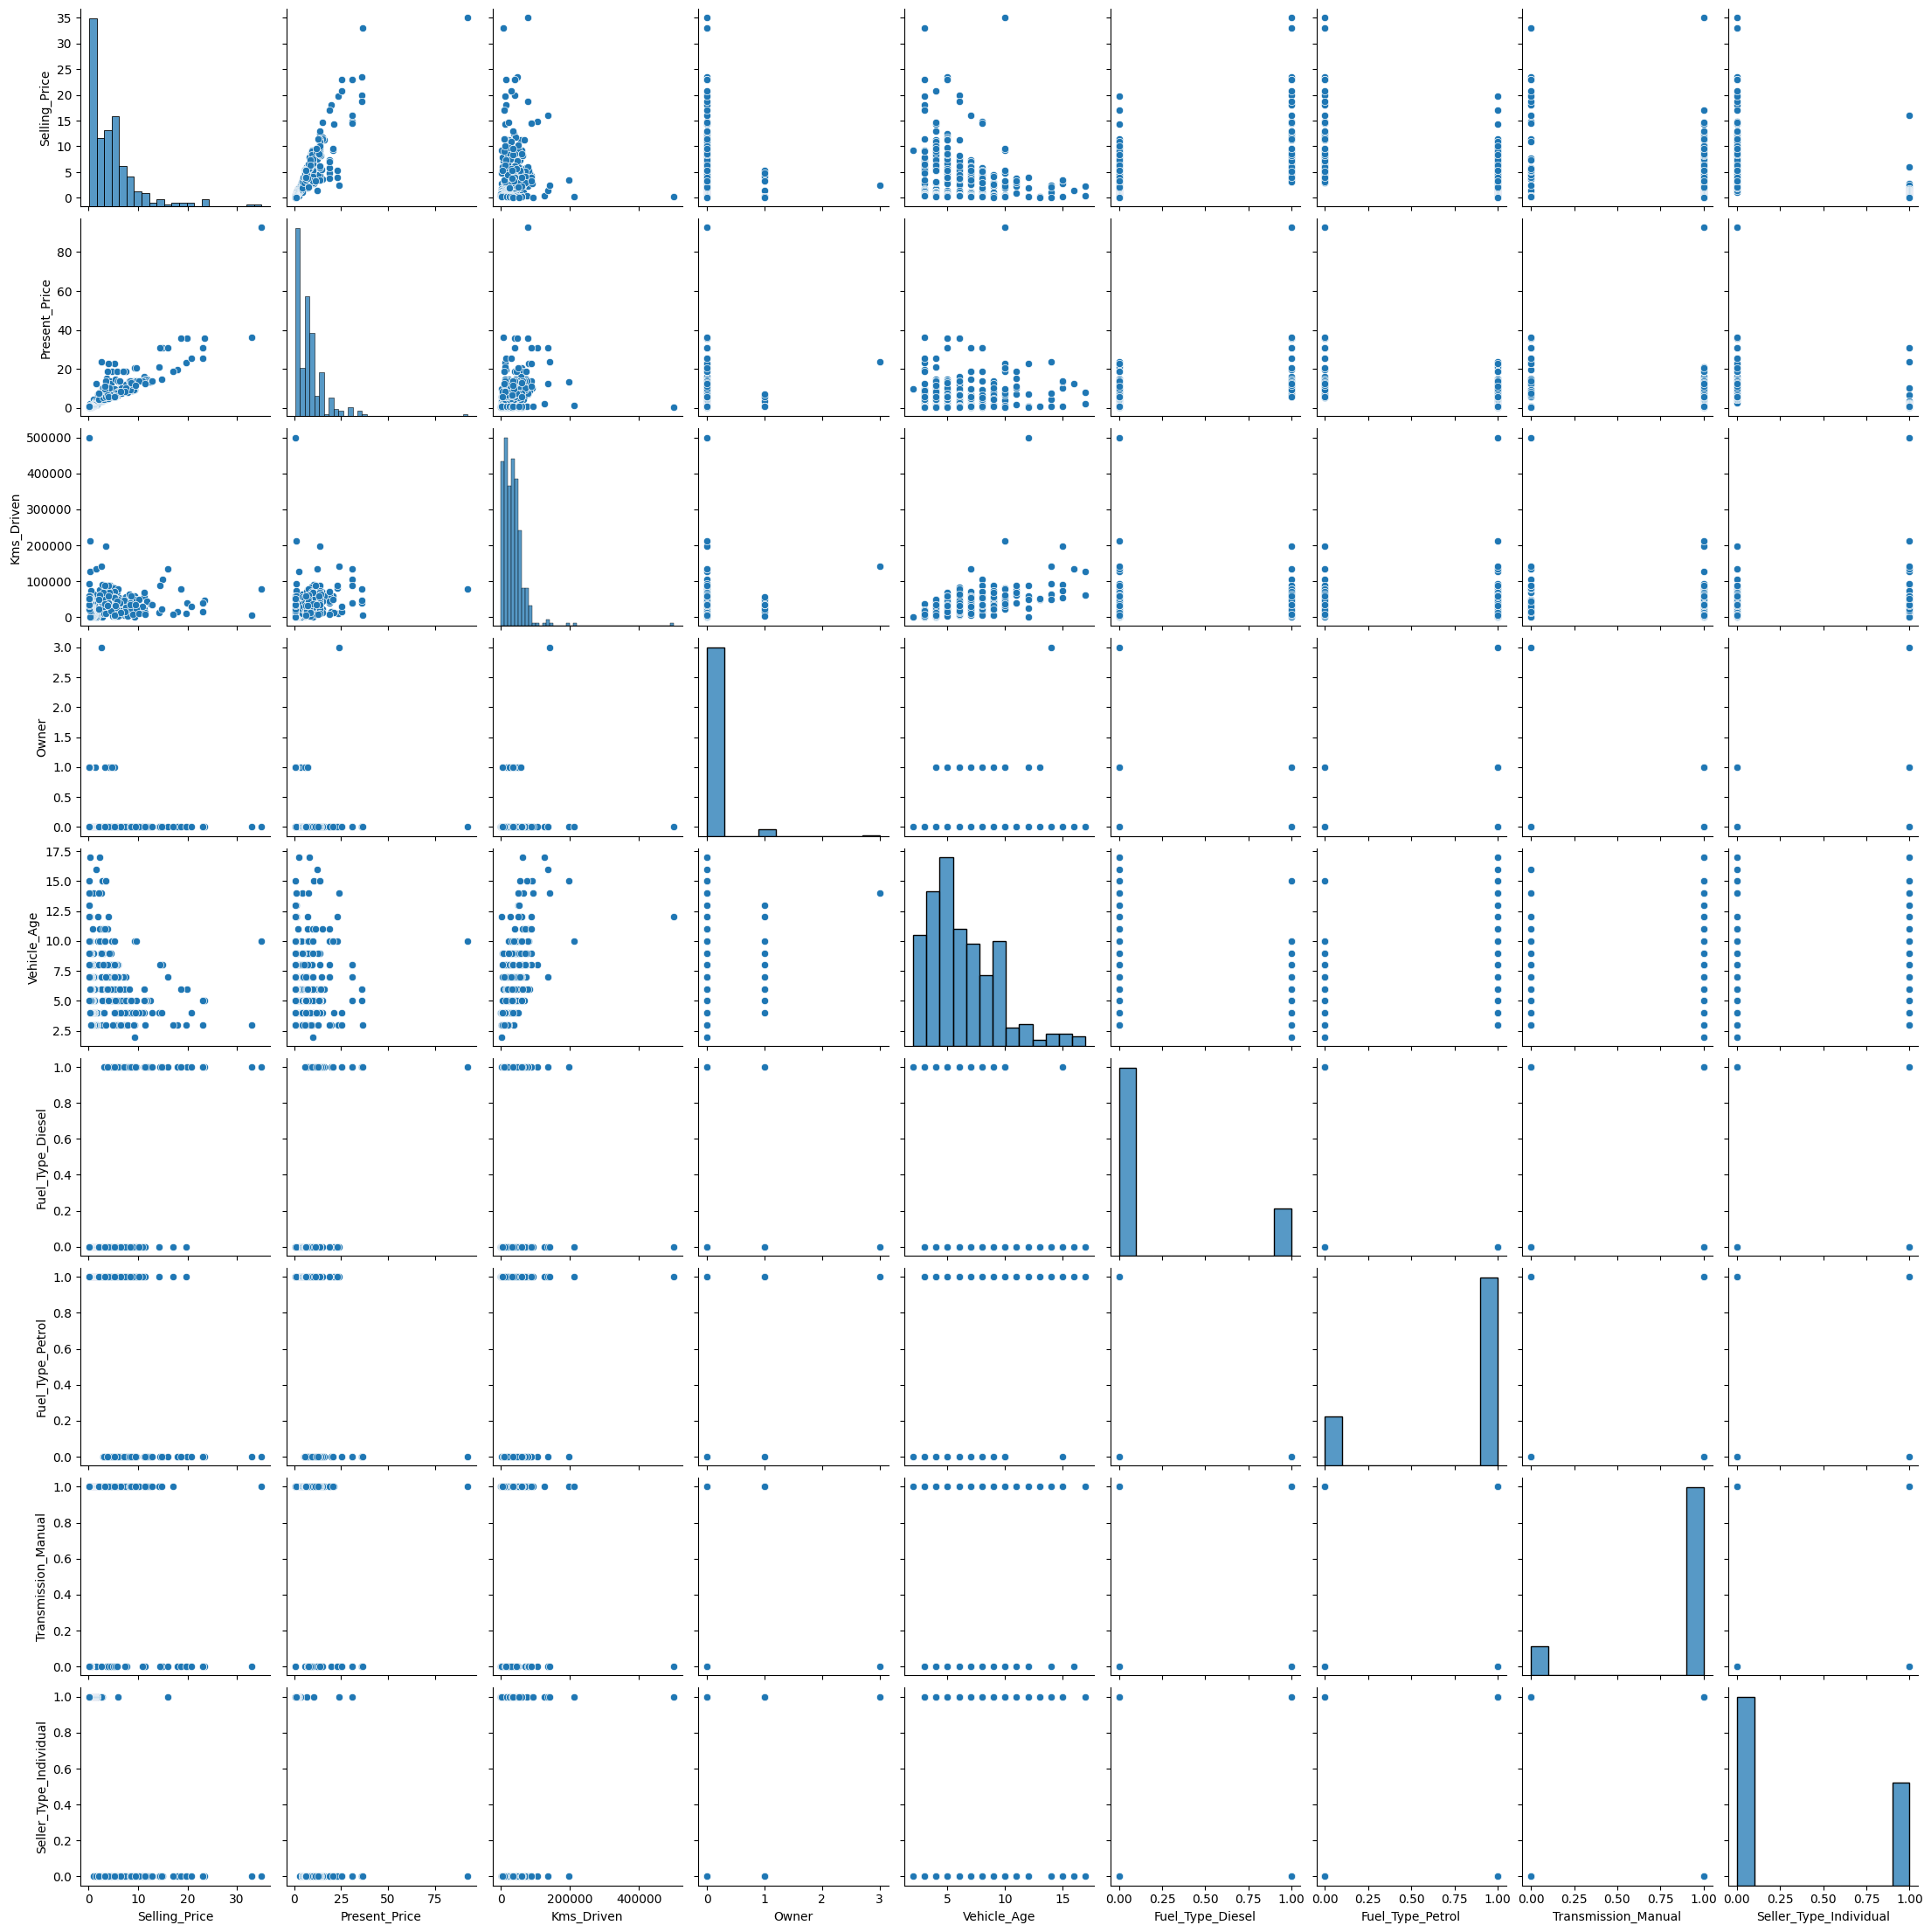

In [13]:
###plot the pairplot to check the relation of the dataset
sns.pairplot(dataset)

<AxesSubplot:>

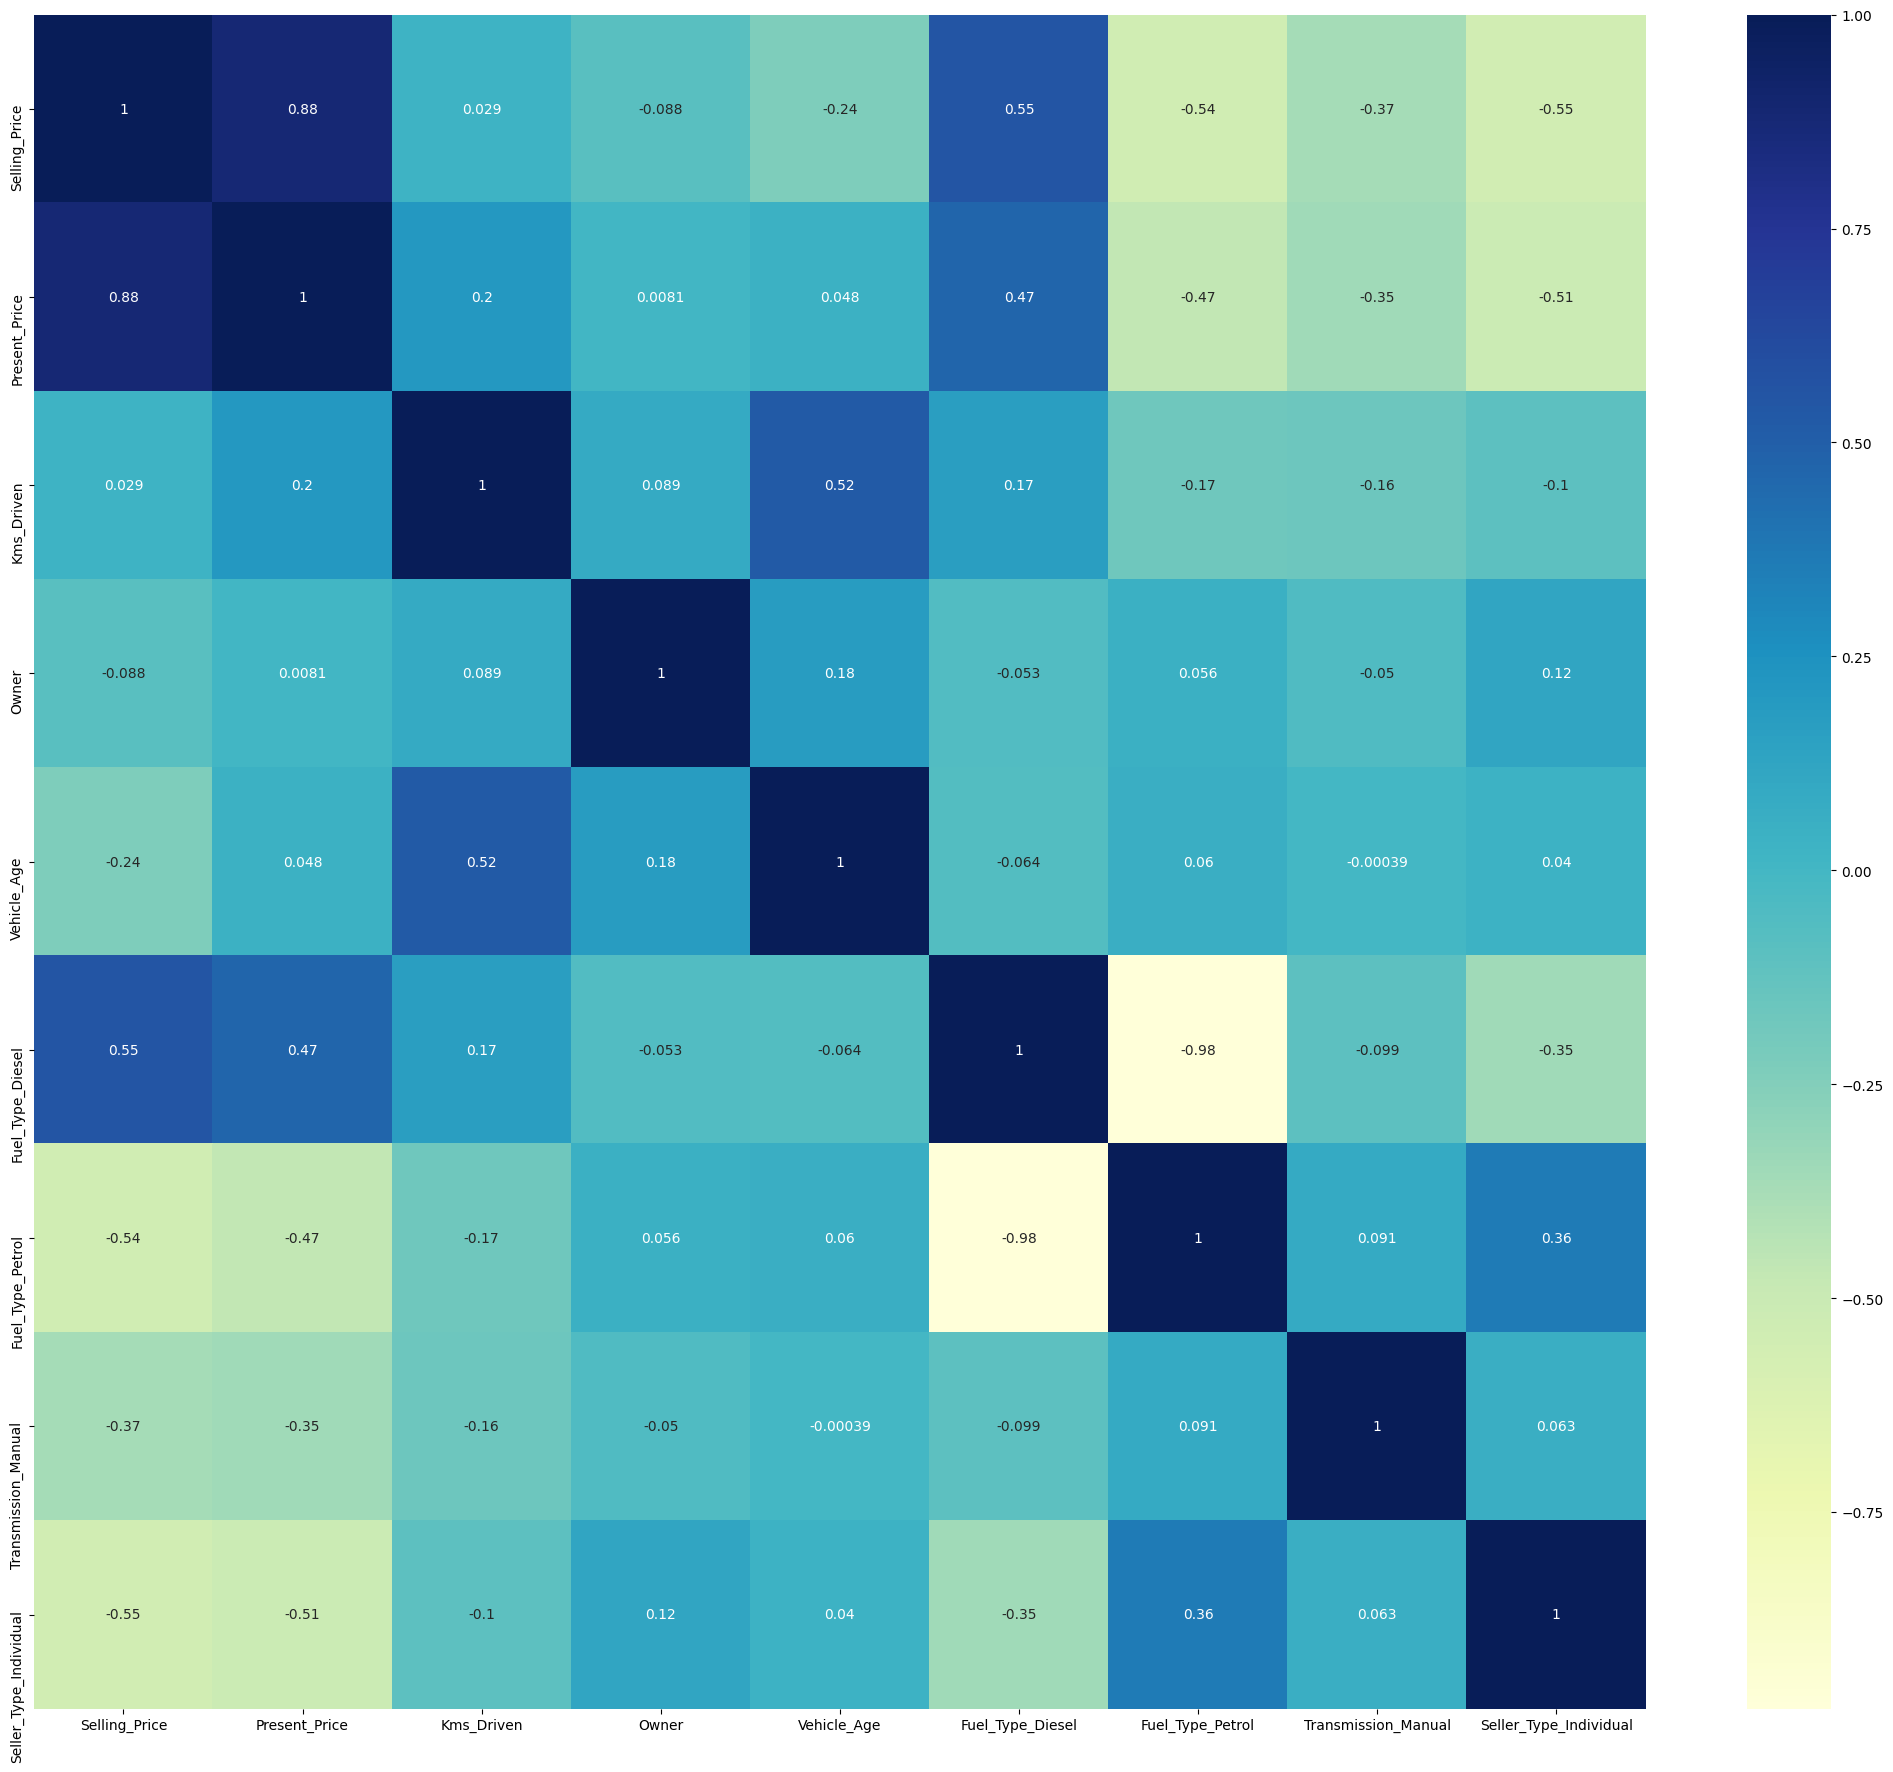

In [16]:
##create the correlation matrix
correlations = dataset.corr()
indx=correlations.index

##plot for clean visualization
plt.figure(figsize=(26,22))
##Check the correlation of the responce variable
sns.heatmap(dataset[indx].corr(),annot=True,cmap="YlGnBu")

### Feature and target variabls

In [17]:
### Seprate the responnce and independant variables
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   Vehicle_Age             301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Transmission_Manual     301 non-null    uint8  
 8   Seller_Type_Individual  301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


In [33]:
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]
##checking and comparing the importance of the features
from sklearn.ensemble import ExtraTreesRegressor
##create object
model = ExtraTreesRegressor()
#fit the model
model.fit(np.asarray(X),np.asarray(y))

print(model.feature_importances_)

[0.38065063 0.04088348 0.00038976 0.07627254 0.22861761 0.0126697
 0.14094156 0.11957471]


<AxesSubplot:>

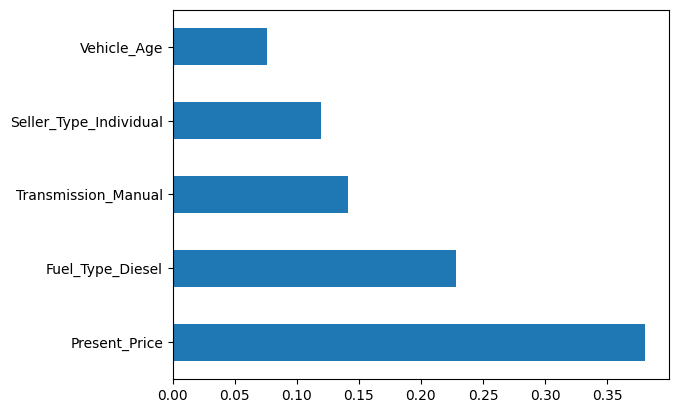

In [35]:
### plot the graph to check the current values
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
##considering the top 5 important feature
feat_importance.nlargest(5).plot(kind='barh')

#### splitting dataset into training and testing

In [36]:
## splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)

### Fitting and evaluating diffrent models
Here I am using three models :

* Linear Regression
* Decision Tree
* Random forest Regressor

I will fit these models and then choose one with the better accuracy. You can use any regression model as per your choice.

### Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression
#create the object
reg=LinearRegression()
##fitting the linear regression model
reg.fit(X_train,y_train)

#predict the test dataset
y_pred = reg.predict(X_test)

#metrics
from sklearn import metrics
#print mean absolute error
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
#print mean square error
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
#print root mean square error
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
#print r2 score
R2=metrics.r2_score(y_test,y_pred)
print('R2',R2)

MAE 1.2426713915033711
MSE: 4.432128265667619
RMSE: 2.1052620420431323
R2 0.8517983059778262


### Decision Tree Model

In [40]:
from sklearn.tree import DecisionTreeRegressor
#create the object
tree=DecisionTreeRegressor()
##fitting the linear regression model
tree.fit(X_train,y_train)

#predict the test dataset
y_pred = tree.predict(X_test)

#metrics
from sklearn import metrics
#print mean absolute error
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
#print mean square error
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
#print root mean square error
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
#print r2 score
R2=metrics.r2_score(y_test,y_pred)
print('R2',R2)

MAE 0.898021978021978
MSE: 2.739925274725275
RMSE: 1.6552719639760938
R2 0.9083822617784078


### Random Foreset Model

In [41]:
from sklearn.ensemble import RandomForestRegressor
#create the object
rf=RandomForestRegressor()
##fitting the linear regression model
rf.fit(X_train,y_train)

#predict the test dataset
y_pred = rf.predict(X_test)

#metrics
from sklearn import metrics
#print mean absolute error
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
#print mean square error
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
#print root mean square error
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
#print r2 score
R2=metrics.r2_score(y_test,y_pred)
print('R2',R2)

MAE 0.7463945054945059
MSE: 2.488144284725274
RMSE: 1.5773852683239038
R2 0.9168013252630155


we want our R2 score to be maximum and other errors to be minimum for better results

Random forest regressor is giving better results. therefore we will hypertune this model and then fit, predict.

### Hyperparameter Tunning

In [42]:
#n_estimators= The number of trees in the forset
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [53]:
from sklearn.model_selection import RandomizedSearchCV

## randomized serch cv

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of feature consider in every split
max_features = ['auto','sqrt']
#maximum number of leaves in trees
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
###minimum number of samples requereds
min_samples_split=[2,5,10,15,100]
## minimum sample requireds in each leaf node
min_samples_leaf = [1,2,5,10]

In [54]:
##create the random grid search\
random_grid = {'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_samples_split,
                'min_samples_leaf':min_samples_leaf

               }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [57]:
### random search parameter using three fold cross validation
#search across the 100 diffrent combinations
rf_random = RandomizedSearchCV(estimator= rf, param_distributions=random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 64)
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [58]:
##fit the random forset model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.


[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV] n_estimator

[Parallel(n_jobs=64)]: Done  34 tasks      | elapsed:    1.9s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV] n_estimators=1100, min_samples_split=100, min

[Parallel(n_jobs=64)]: Done 237 tasks      | elapsed:    4.7s


[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.4s
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.4s
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.9s
[CV] n_estimators=300, min_samples_spl

[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    8.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=64,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [59]:
#displaying the best parameters
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

### Fianl Prediction

In [60]:
#predicting against test data
y_pred=rf_random.predict(X_test)
#print the erros
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.7792163369368729
MSE: 2.5180785821455482
RMSE: 1.5868454814964021
R2: 0.915800380948878


### Save the model

In [61]:
import pickle
##open file where you want to store dataset
file = open('car_price_model.pkl','wb')

##dump imformation of that file
pickle.dump(rf_random, file)